In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [66]:
def plotmodel(W=(1,1,1), seed=0, p=(0,0)):

    np.random.seed(seed)

    w1 = W[0]
    w2 = W[1]
    b = W[2]

    X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)

    fig = plt.figure(figsize=(10, 8))
    plt.scatter(X[:,0], X[:,1], c=Y, edgecolor='k')
    plt.grid(True)

    xmin, xmax = plt.gca().get_xlim()
    ymin, ymax = plt.gca().get_ylim()

    plt.axhline(0, xmin, xmax, color='k', linewidth=1)
    plt.axvline(0, ymin, ymax, color='k', linewidth=1)

    x = np.linspace(xmin, xmax, 50)
    y = (-w1*x - b) / w2

    plt.plot(x, y)
    plt.plot(p[0], p[1], marker='^', color='r', markersize=20)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    
    return X, Y

In [52]:
def classify(W=(1,1,1), p=(1,1)):
    ret = W[0]*p[0] + W[1]*p[1] + W[2]

    return (1, 'yellow') if ret > 0 else (0, 'blue'), ret

Pesos iniciais: [0.5406104 0.5869042]
Bias inicial: -0.16565567
((1, 'yellow'), 10.6)


tensor([10.6000], grad_fn=<AddBackward0>)

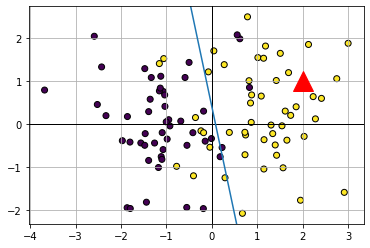

In [58]:
torch.manual_seed(42)
perceptron = nn.Linear(in_features=2, out_features=1)
sigmoide = nn.Sigmoid()

print('Pesos iniciais:', perceptron.weight.data.numpy()[0])
print('Bias inicial:', perceptron.bias.data.numpy()[0])

W = (5,1,-0.4)
perceptron.weight = nn.Parameter(torch.Tensor([[W[0], W[1]]]))
perceptron.bias = nn.Parameter(torch.Tensor([W[2]]))

p = (2,1)

X, Y = plotmodel(W, 46, p=p)
print(classify(W, p))

perceptron(torch.Tensor(p))

# Plot do valor de saída do perceptron

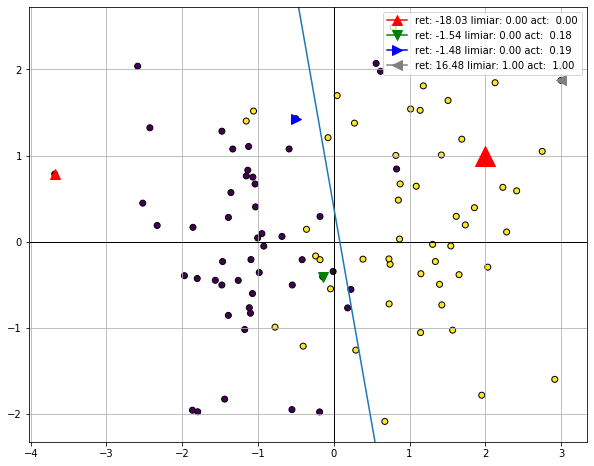

In [69]:
# Vamos plotar os pontos 17, 21, 43 e 66 e classificá-los
markers = ['^','v','>','<']
colors = ['r', 'g', 'b', 'gray']

plotmodel(W, 46, p)

for k, idx in enumerate([17, 21, 43, 66]):
    x = torch.Tensor(X[idx])
    
    ret = perceptron(x)
    act = sigmoide(ret)
    
    act_limiar = 0 if ret.data < 0 else 1
    
    label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + ' limiar: {:4.2f}'.format(act_limiar) + ' act: {:5.2f}'.format(act.data.numpy()[0])
    plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=10, label=label)
    
plt.legend()
plt.show()

# Variação com novo ponto (novo bias)

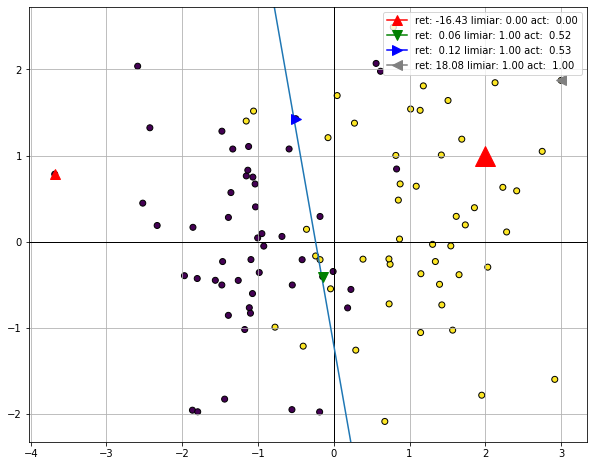

In [71]:
W = (5, 1, 1.2)

perceptron.bias = nn.Parameter(torch.Tensor([W[2]]))

plotmodel(W, 46, p)

for k, idx in enumerate([17, 21, 43, 66]):
    x = torch.Tensor(X[idx])
    
    ret = perceptron(x)
    act = sigmoide(ret)
    
    act_limiar = 0 if ret.data < 0 else 1
    
    label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + ' limiar: {:4.2f}'.format(act_limiar) + ' act: {:5.2f}'.format(act.data.numpy()[0])
    plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=10, label=label)
    
plt.legend()
plt.show()